# EXAMEN

### Ejercicio 1

In [96]:
# imports
import glob as glob
import pandas as pd

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

# quitar filas y columnas

# ---------------------------- / LECTURA DE DATOS / ----------------------------------
# coge todos los pathnames de los csvs de la carpeta que tenga 
data = pd.read_csv("dementia_dataset.csv")        # lee el csv


# variable para guardar los datos temporalmente, por si acaso 
temp_data = data

# --------------- / PARA QUITAR CUALQUIER COLUMNA QUE NO INTERESE / ---------------------
unnecessary_columns = [
    "Subject ID", 
    "MRI ID", 
    "Hand"          #
    ]


# pandas tiene la opcion de quitar columnas segun sus nombres
final_data = data.drop(columns=unnecessary_columns) 


# ---------------- / SDOUFBHKSUDFG /  -------------------
oneHot_columns = [
    "M/F"
]

# creamos el encoder
encoder = OneHotEncoder(sparse_output=False)   # queremos que sea sparse?¿
# le decirmos las columnas que queremos codificar
encoder_data = data[oneHot_columns]
# las ajustamos
encoder_final = encoder.fit_transform(encoder_data)  

# dbug
print(encoder_final.shape)

# le metemos todos los datos menos los del OneHot
final_data = final_data.drop(columns=oneHot_columns)
# hacemos un dataFrame de pandas para poder meter los nombres de las columas nuevas
oneHot_df = pd.DataFrame(encoder_final, columns=encoder.get_feature_names_out(oneHot_columns))
# junta el df sin las columnas del oneHot con las del oneHot en el eje de columnas
final_data = pd.concat([final_data, oneHot_df], axis=1)



standardScaling_columns = [
    "EDUC",
    "SES",
    "MMSE",
    "CDR",
    "eTIV",
    "nWBV",
    "ASF",
    "Visit",        #
    "MR Delay"
]



# crea el encoder
scaler = StandardScaler()
# coge las columnas que necesita
scaler_data = data[standardScaling_columns]
# las normaliza
scaler_final = scaler.fit_transform(scaler_data)
# las intercambia
final_data[standardScaling_columns] = scaler_final


# ----------------- / LABELED ENCODER / -------------------------
# en este caso solo hay una columna que queramos, como es la solucion la codificamos por separado
labeled_columns = "Group"       

# crea el encoder
labler = LabelEncoder()
# transformamos la variable
labeled_final = labler.fit_transform(data[labeled_columns])

# intercambia la columna antigua con la nueva
final_data[labeled_columns] = labeled_final


#final_data.dropna(how='any')
final_data = final_data.dropna(how="any")
print(final_data)


#print(final_data)

# para guardarlas en un archivo
final_data.to_csv("./examen.csv", index=False)


(373, 2)
     Group     Visit  MR Delay  Age      EDUC       SES      MMSE       CDR  \
0        2 -0.957067 -0.937715   87 -0.208132 -0.406615 -0.093065 -0.777653   
1        2  0.127997 -0.217613   88 -0.208132 -0.406615  0.722535 -0.777653   
5        2 -0.957067 -0.937715   88  1.184392  0.476463  0.178802 -0.777653   
6        2  0.127997 -0.089980   90  1.184392  0.476463 -0.093065 -0.777653   
7        2 -0.957067 -0.937715   80 -0.904394  1.359542  0.178802 -0.777653   
..     ...       ...       ...  ...       ...       ...       ...       ...   
368      1  0.127997  0.389037   82  0.488130 -1.289694  0.178802  0.559050   
369      1  1.213060  2.681702   86  0.488130 -1.289694 -0.364931  0.559050   
370      2 -0.957067 -0.937715   61 -0.556263 -0.406615  0.722535 -0.777653   
371      2  0.127997  0.264555   63 -0.556263 -0.406615  0.722535 -0.777653   
372      2  1.213060  1.596034   65 -0.556263 -0.406615  0.722535 -0.777653   

         eTIV      nWBV       ASF  M/F_F  

## Ejercicio 2

        Visit  MR Delay  Age      EDUC       SES      MMSE       CDR  \
0   -0.957067 -0.937715   87 -0.208132 -0.406615 -0.093065 -0.777653   
1    0.127997 -0.217613   88 -0.208132 -0.406615  0.722535 -0.777653   
5   -0.957067 -0.937715   88  1.184392  0.476463  0.178802 -0.777653   
6    0.127997 -0.089980   90  1.184392  0.476463 -0.093065 -0.777653   
7   -0.957067 -0.937715   80 -0.904394  1.359542  0.178802 -0.777653   
..        ...       ...  ...       ...       ...       ...       ...   
368  0.127997  0.389037   82  0.488130 -1.289694  0.178802  0.559050   
369  1.213060  2.681702   86  0.488130 -1.289694 -0.364931  0.559050   
370 -0.957067 -0.937715   61 -0.556263 -0.406615  0.722535 -0.777653   
371  0.127997  0.264555   63 -0.556263 -0.406615  0.722535 -0.777653   
372  1.213060  1.596034   65 -0.556263 -0.406615  0.722535 -0.777653   

         eTIV      nWBV       ASF  M/F_F  M/F_M  
0    2.836059 -0.905169 -2.265742    0.0    1.0  
1    2.932703 -1.309643 -2.316501  

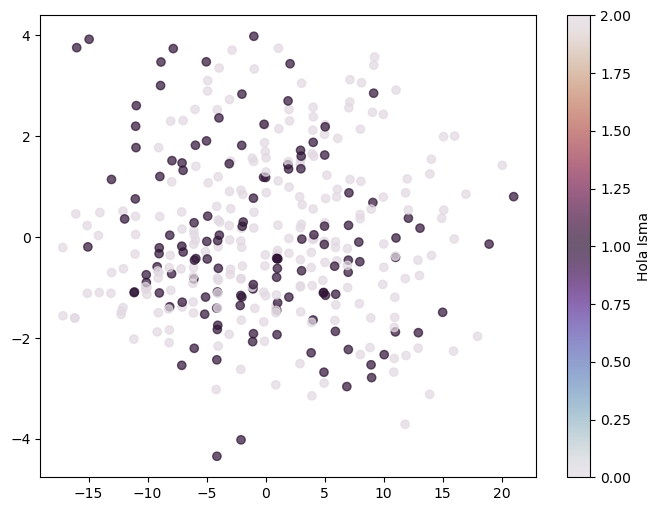

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# para estos hay que estar en el entorno, mejor abrir con anaconda
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

data = final_data

# -------------------- / FILTRADO DE DATOS / -------------------
# selecciona las columnas innecesarias que no queramos represetar
unnecessary_columns = ["Group"]
# coge los atributos que queramos representar
atributes = data.drop(columns=unnecessary_columns)   # coge la primera columna MENOS la de action lmao
# para el color cogemos el dato solucion



print(atributes)
    
# ¿?¿?¿?¿?¿?¿
color = data["Group"]  #codificando cada action como un color

# ------------------- / DISMINUCION DE DIMENSIONES / ------------------------ 

# MOMENTO PCA: 
# eL PCA lo que hace es minimizar linealmente el numero de atributos que queramos representar segun sus correlaciones, 
# es decir, intenta sacar las x variables mas representativas
# indicamos cuantos componentes queremos, como queremos hacer la representacion visual ponemos 2
pca_comp = PCA(n_components=2)
hola = pca_comp.fit_transform(atributes)

# ---------------------------- / PINTADO / ------------------------ 

# pintamos la tabla
plt.figure(figsize=(8,6))

# pintamos los datos
scatter = plt.scatter(     
    hola[:, 0],                 # eje x
    hola[:, 1],                 # eje y
    c = color.astype(int),      # color             
    cmap = "twilight",        # paleta
    alpha = 0.7                 # alfa
)

# pintamos la barra 
plt.colorbar(scatter, label="Hola Isma")

# enseñamos la frafica
plt.show()

## Ejercicio 3

In [100]:
import MLP_Complete as mlp
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

unnecessary_columns = ["Group"]

# coge todos los datos menos la columna de action (la solucion)
X = final_data.drop(unnecessary_columns, axis=1).values

# get_dummies: convierte la columna de action en una tabla de trues y falses indicando que accion esta en cada caso
y = final_data[unnecessary_columns].values

# coge los valores posibles de action
y_labels = final_data["Group"].values


# separa los datos ->
# y_train_lbl; y_test_lbl -> se refiere a las columnas de action que estan procesadas como labeled
X_train, X_test, y_train, y_test, y_train_lbl, y_test_lbl= train_test_split(
    X, y, y_labels,  random_state=42, test_size=0.33, shuffle=True )



Iteration      1: Cost   0.7197   
Iteration    101: Cost  -0.3924   
Iteration    201: Cost  -1.1395   
Iteration    301: Cost  -1.8367   
Iteration    401: Cost  -2.5558   
Iteration    501: Cost  -3.2960   
Iteration    601: Cost  -4.0459   
Iteration    701: Cost  -4.7996   
Iteration    801: Cost  -5.5547   
Iteration    901: Cost  -6.3101   
Iteration   1000: Cost  -7.0582   
-> Validacion Custom MLP: 11.97%


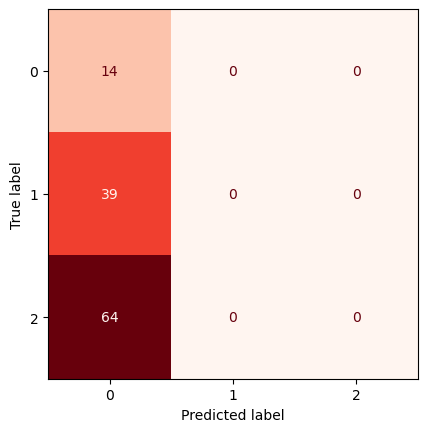

In [122]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# valores que vamos tocando
LAYERS=(10, 3)
LAMBDA=0.001
LR_INIT=0.01
ITERATIONS = 1000

# mlp
mlp_custom = mlp.MLP_Complete(inputLayer=X_train.shape[1], hiddenLayers=list(LAYERS), outputLayer=y_train.shape[1], seed=42)
mlp_custom.backpropagation(X_train, 
                        y_train, 
                        alpha=LR_INIT, 
                        lambda_=LAMBDA, 
                        numIte=ITERATIONS, 
                        verbose=100)

a, z = mlp_custom.feedforward(X_test)
y_pred_custom = mlp_custom.predict(a[-1])
    
acc_custom = accuracy_score(y_test_lbl, y_pred_custom)

print(f"-> Validacion Custom MLP: {acc_custom * 100:.2f}%")

ConfusionMatrixDisplay.from_predictions(y_test_lbl, y_pred_custom, cmap="Reds", colorbar=False)


In [129]:
from sklearn.neural_network import MLPClassifier

mlp_sklearn = MLPClassifier(
        hidden_layer_sizes=LAYERS,
        activation='logistic',     
        solver='adam',             
        max_iter=ITERATIONS,
        learning_rate="constant",
        learning_rate_init=LR_INIT,
        alpha=LAMBDA,             
        random_state=42,
        n_iter_no_change=100,
        verbose=True
    )

mlp_sklearn.fit(X_train, y_train_lbl)

y_pred_sklearn = mlp_sklearn.predict(X_test)

acc_sklearn = accuracy_score(y_test_lbl, y_pred_sklearn)

print(f"-> Validacion SKLearn MLP: {acc_sklearn * 100:.2f}%")

Iteration 1, loss = 1.17171930
Iteration 2, loss = 1.13810724
Iteration 3, loss = 1.11174888
Iteration 4, loss = 1.08845856
Iteration 5, loss = 1.06679417
Iteration 6, loss = 1.04813962
Iteration 7, loss = 1.03325088
Iteration 8, loss = 1.01931591
Iteration 9, loss = 1.00558106
Iteration 10, loss = 0.99196077
Iteration 11, loss = 0.98017042
Iteration 12, loss = 0.96730931
Iteration 13, loss = 0.95510086
Iteration 14, loss = 0.94343288
Iteration 15, loss = 0.93307306
Iteration 16, loss = 0.92331733
Iteration 17, loss = 0.91214480
Iteration 18, loss = 0.89807691
Iteration 19, loss = 0.88648220
Iteration 20, loss = 0.87848475
Iteration 21, loss = 0.86812697
Iteration 22, loss = 0.85891951
Iteration 23, loss = 0.85313376
Iteration 24, loss = 0.84149216
Iteration 25, loss = 0.82700108
Iteration 26, loss = 0.81776496
Iteration 27, loss = 0.80457623
Iteration 28, loss = 0.79257019
Iteration 29, loss = 0.77762526
Iteration 30, loss = 0.76216741
Iteration 31, loss = 0.75738563
Iteration 32, los

c:\Users\Ines\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## Ejercicio 4

In [147]:
# codigo del decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score


dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train_lbl)
y_pred_dt = dt.predict(X_test)
acc_dt = precision_score(y_test_lbl, y_pred_dt, average='micro')

print(f"-> Validacion DT: {acc_dt * 100:.2f}%")

-> Validacion DT: 87.18%


## Ejercicio 5


